!jt -t chesterish
# !jt -r

In [1]:
from genetic_algorithm import *
from movement import *
from numpy.random import default_rng
import pickle

import binascii


import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
# %matplotlib notebook

import copy
from collections import Counter
import pandas as pd

In [11]:
## hexadecimal generator

nr_of_input = 2
nr_of_actions = 5
nr_of_inner = 2
nr_of_genes = 8
nr_individuals = 600

nr_of_generations = 100

## world size
world_size = 100
world_size_x = world_size
world_size_y = world_size

## generations

In [ ]:
# for gen_nr in range(nr_of_generations):
#     print(gen_nr)
#     if gen_nr == 0:
#         result = initial_population(nr_individuals, nr_of_genes, nr_of_input, nr_of_actions, nr_of_inner, world_size)
#         result, a,b,c,d,e = steps_in_generation(world_size*1.2, result, world_size_x, world_size_y)
#         print(a,b,c,d,e)

In [12]:
def steps_in_generation(result, world_size_x, world_size_y, n):
    for indiv in result:
        x, y = result[indiv]['position'][-1][0], result[indiv]['position'][-1][1]
        if n<1:
            calculate_position(result, indiv, x, y, world_size_x, world_size_y)

        elif n >= 1:
            apply_input(result, indiv)
            calculate_position(result, indiv, x, y, world_size_x, world_size_y)

        # prevent_overlap_movement(last_pos_list, result)
        for prev in sorted(result.keys()): 
            if prev != indiv and result[prev]['position'][-1] == result[indiv]['position'][-1]:
                result[indiv]['position'][-1] = result[indiv]['position'][-2]

0


MovieWriter imagemagick unavailable; using Pillow instead.


1


MovieWriter imagemagick unavailable; using Pillow instead.


2


MovieWriter imagemagick unavailable; using Pillow instead.


3


MovieWriter imagemagick unavailable; using Pillow instead.


4


MovieWriter imagemagick unavailable; using Pillow instead.


KeyboardInterrupt: 

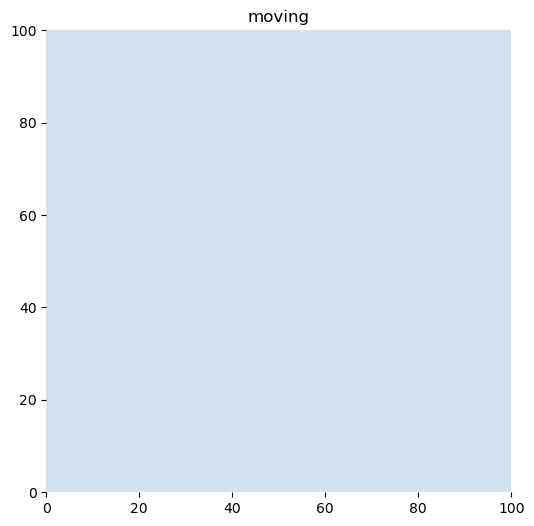

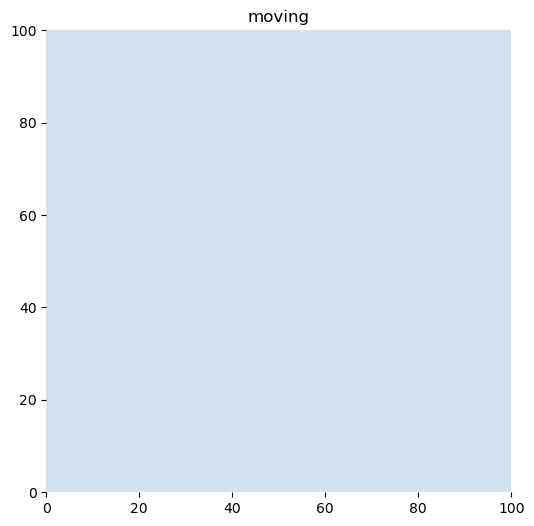

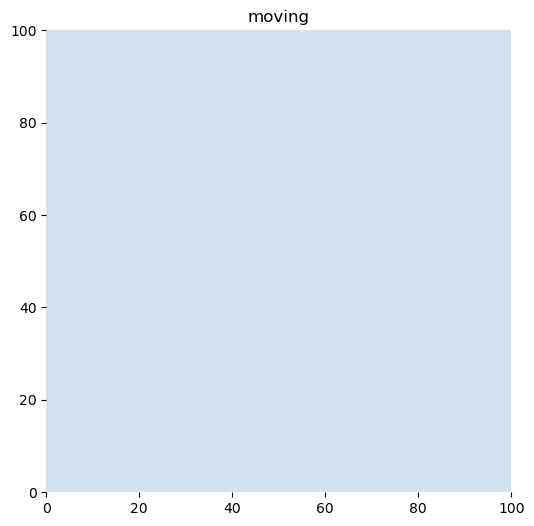

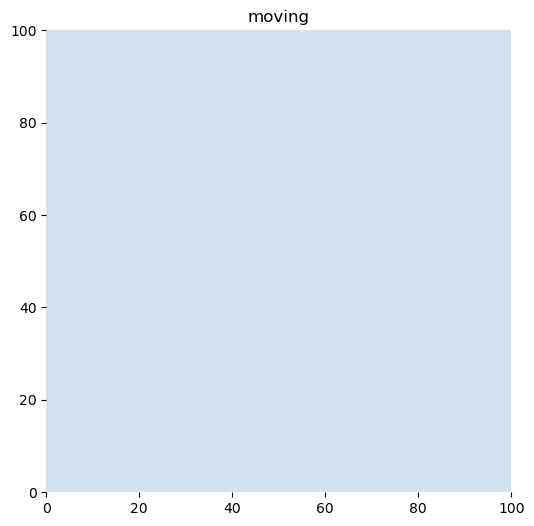

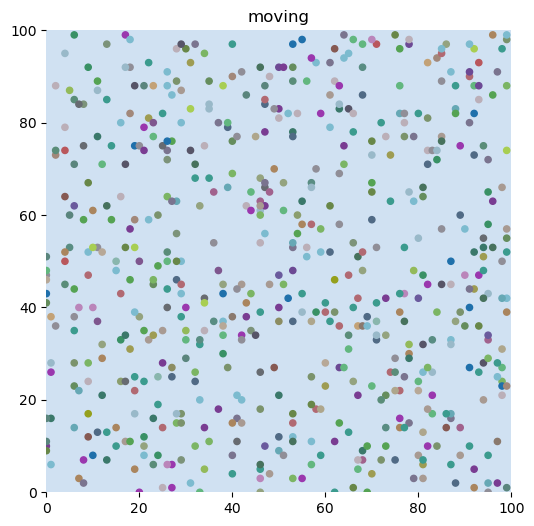

In [20]:
time_list = []
result = {}
for gen_nr in range(nr_of_generations):
    print(gen_nr)
    if gen_nr == 0:
        result = initial_population(nr_individuals, nr_of_genes, nr_of_input, nr_of_actions, nr_of_inner, world_size)
#         result, a,b,c,d = steps_in_generation(world_size*1.2, result, world_size_x, world_size_y)
        (steps_in_generation(result, world_size_x, world_size_y, n) for n in range(world_size))
#         print(result[0])
    else:
        
        result = asexual_reproduction_and_mutation(world_size, result, nr_individuals)
        if result:
            result = next_generation(result,nr_of_input, nr_of_actions, nr_of_inner, world_size, nr_individuals)
#             result, a,b,c,d  = steps_in_generation(world_size*1.2, result, world_size_x, world_size_y)
            (steps_in_generation(result, world_size_x, world_size_y, n) for n in range(world_size))
#             time_list.append([a,b,c,d])
    result.update(result)
    
    dic_color = {}
    for indiv in result:
        rgb_colors = list(map(hex_to_rgb, result[indiv]['genome']))
        color = tuple(pd.DataFrame(rgb_colors).median()) 
        dic_color[indiv] = color
        
    coords = generate_dictionary_of_coords(result, world_size*2, dic_color)
    
    def update(i):
        ax.clear()
        ax.set_facecolor(plt.cm.Blues(.2))

        ax.set_xlim([0,world_size_x])
        ax.set_ylim([0,world_size_y])
        ax.set_title('moving')
        ax.scatter(x=coords[i]['x'],y=coords[i]['y'], c=coords[i]['color'], s=20, marker='o')
        [spine.set_visible(False) for spine in ax.spines.values()]


    fig, ax = plt.subplots(figsize=(6,6))
    myAnimation = FuncAnimation(
        fig = fig,
        func = update,
        frames = len(coords),
        interval = 10, repeat=False
    )
    myAnimation.save(f'./output/generation-{gen_nr}.gif', writer='imagemagick' , fps=10)
    # create a binary pickle file 
    f = open(f'./output/generation-{gen_nr}.pkl',"wb")
    pickle.dump(result, f)
    f.close()

In [25]:
r = [steps_in_generation(result, world_size_x, world_size_y, n) for n in range(world_size)]

In [26]:
r

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]